In [6]:
import iapws_boundaries
import methane_hydrate
import gas_eos
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

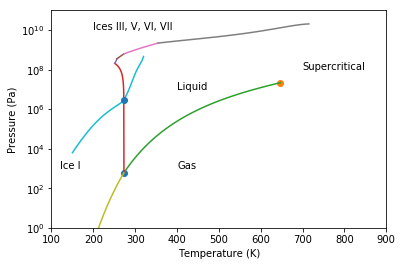

In [2]:
iapws_boundaries.plot_boundaries()
methane_hydrate.plot_boundaries()

In [3]:
gas_eos.pressure_peng_robinson(1,500)

14353239.234551668

In [17]:
T_min, T_max = 200, 500
p_min, p_max = 1e4, 1e8
data = []
for t in np.linspace(T_min,T_max,100):
    rho0 = gas_eos.rho_peng_robinson(p_min,t)
    rho1 = gas_eos.rho_peng_robinson(p_max,t)
    rhos = np.linspace(rho0,rho1,100)
    ps = gas_eos.pressure_peng_robinson(rhos,t)
    tslice= t*np.ones(100)
    data.append(np.vstack([tslice,ps,rhos]).T)
data = np.vstack(data)

In [11]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [18]:
data

array([[2.00000000e+02, 1.00000000e+04, 1.73804486e-03],
       [2.00000000e+02, 1.02334321e+06, 1.77926678e-01],
       [2.00000000e+02, 2.03594794e+06, 3.54115312e-01],
       ...,
       [5.00000000e+02, 9.79795661e+07, 6.86506574e+00],
       [5.00000000e+02, 9.89897321e+07, 6.93583244e+00],
       [5.00000000e+02, 1.00000000e+08, 7.00659915e+00]])

In [20]:
macro = lambda D,c, **kwargs : go.Scatter3d(x=D[:,0],y=np.log(D[:,1]),z=D[:,2],surfacecolor=c,
                                            mode='markers',marker={'size':2},**kwargs)
plot_data = [macro(data,'green')]
layout = go.Layout(scene=dict(
    xaxis=dict(
        title='T',
    ),
    yaxis=dict(
        title='log(p)'
    ),
    zaxis=dict(
        title='rho'
    )
))
fig = go.Figure(data=plot_data)

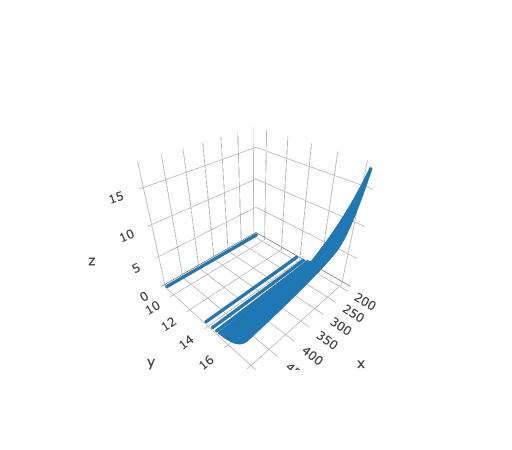

In [21]:
py.iplot(fig)